# Project Details

Your tasks in this project are as follows:
1. Data wrangling, which consists of:
    * Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    * Assessing data
    * Cleaning data
2. Storing, analyzing, and visualizing your wrangled data
3. Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

## Data Wrangling
### Gathering
1. Twitter Archive Enhanced

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json

In [2]:
# after downloading the corresponding source data file from url: 
# https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv
# I uploaded the file to the jupyter notebook and am now able to import it using the pandas library.
tw_arch_enh = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# sort the dataframe by timestamp descending to have the latest entries on top and visualize the top 5 rows
tw_arch_enh.sort_values('timestamp',ascending=False,inplace=True)
tw_arch_enh.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Tweet image prediction

In [4]:
# download from url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

# read TSV (tab-separated value) file, therefore set the separator to \t (tab)
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
# display the first 5 rows to see if it worked
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Twitter API

In [6]:
# https://www.digitalocean.com/community/tutorials/how-to-authenticate-a-python-application-with-twitter-using-tweepy-on-ubuntu-14-04
# setting the keys and secrets to establish a connection
# ************** keys removed for submission
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

In [7]:
# source: https://tweepy.readthedocs.io/en/latest/getting_started.html
# source: https://www.digitalocean.com/community/tutorials/how-to-authenticate-a-python-application-with-twitter-using-tweepy-on-ubuntu-14-04
# configuring the connection
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [8]:
# download tweepy status object with tweet id to this list:
list_of_tweets = []
# tweets that can't be found are saved in this list:
list_of_ids_without_tweets = []
count = 0
for tweet_id in tw_arch_enh['tweet_id']:   
    count += 1
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        list_of_ids_without_tweets.append(tweet_id)
    # to keep track on how much items are already processed
    if count % 50 == 0:
        print(str(count) + " items are processed.")

50 items are processed.
100 items are processed.
150 items are processed.
200 items are processed.
250 items are processed.
300 items are processed.
350 items are processed.
400 items are processed.
450 items are processed.
500 items are processed.
550 items are processed.
600 items are processed.
650 items are processed.
700 items are processed.
750 items are processed.
800 items are processed.
850 items are processed.
900 items are processed.
Rate limit reached. Sleeping for: 717
950 items are processed.
1000 items are processed.
1050 items are processed.
1100 items are processed.
1150 items are processed.
1200 items are processed.
1250 items are processed.
1300 items are processed.
1350 items are processed.
1400 items are processed.
1450 items are processed.
1500 items are processed.
1550 items are processed.
1600 items are processed.
1650 items are processed.
1700 items are processed.
1750 items are processed.
1800 items are processed.
Rate limit reached. Sleeping for: 717
1850 ite

In [9]:
# name the output file
tweet_json_file = 'tweet_json.txt'
# save the JSON data in the list to an output file
with open('tweet_json.txt', 'w') as file:
        for tweet_json in list_of_tweets:
            json.dump(tweet_json, file)
            file.write('\n')

In [5]:
tweet_json_file = 'tweet_json.txt'
# build a dataframe of the relevant nodes in the JSON data from the text file previously created
json_tweet_dict_list = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)
        retweeted_status = data['retweeted_status'] = data.get('retweeted_status', 'original')
        if retweeted_status == 'original':
            url = data['text'][data['text'].find('https'):]
        else:
            retweeted_status = 'retweet'
            url = 'retweet'
        
        # create a dictionary with the JSON data, then add to a list
        json_data_dict = {'tweet_id': str(data['id']), 
                            'favorite_count': int(data['favorite_count']),
                            'retweet_count': int(data['retweet_count']),
                            'followers_count': int(data['user']['followers_count']),
                            'friends_count': int(data['user']['friends_count']),
                            'url': url,
                            'retweeted_status': str(retweeted_status)
                    }
        json_tweet_dict_list.append(json_data_dict)

        # read the next line of JSON data
        line = json_file.readline()

# convert the tweet JSON data dictionary list to a DataFrame
tw_api_extra = pd.DataFrame(json_tweet_dict_list, 
                               columns = ['tweet_id',
                                    'favorite_count',
                                    'retweet_count',
                                    'followers_count',
                                    'friends_count',
                                    'url',
                                    'retweeted_status'])

tw_api_extra.head(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,url,retweeted_status
0,892420643555336193,37473,8162,8120160,12,https://t.co/MgUWQ76dJU,original
1,892177421306343426,32209,6039,8120160,12,https://t.co/aQFSeaCu9L,original
2,891815181378084864,24279,3998,8120160,12,https://t.co/r0YlrsGCgy,original
3,891689557279858688,40799,8313,8120160,12,https://t.co/tD36da7qLQ,original
4,891327558926688256,39013,9009,8120160,12,https://t.co/0g0KMIVXZ3,original
5,891087950875897856,19608,2990,8120160,12,https://t.co/xx5cilW0Dd,original
6,890971913173991426,11449,1984,8120160,12,https://t.co/MV01Q820LT,original
7,890729181411237888,63215,18126,8120160,12,https://t.co/hrcFOGi12V,original
8,890609185150312448,26967,4103,8120160,12,https://t.co/UkrdQyoYxV,original
9,890240255349198849,30904,7092,8120160,12,https://t.co/l3TSS3o2M0,original


## Assessing Data
### Visual

To assess the data visually one can either just visualize the corresponding data frames directly in the jupyter notebook or alternatively display it in another tool (e.g. Excel). I will choose to display the three data frames here. The mein part of the assessment process will anyway be the programmatical assessment which I will do later.

In [6]:
# visualize the twitter archive enhanced data frame
tw_arch_enh

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# visualize the twitter api extra data frame
tw_api_extra

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,url,retweeted_status
0,892420643555336193,37473,8162,8120160,12,https://t.co/MgUWQ76dJU,original
1,892177421306343426,32209,6039,8120160,12,https://t.co/aQFSeaCu9L,original
2,891815181378084864,24279,3998,8120160,12,https://t.co/r0YlrsGCgy,original
3,891689557279858688,40799,8313,8120160,12,https://t.co/tD36da7qLQ,original
4,891327558926688256,39013,9009,8120160,12,https://t.co/0g0KMIVXZ3,original
5,891087950875897856,19608,2990,8120160,12,https://t.co/xx5cilW0Dd,original
6,890971913173991426,11449,1984,8120160,12,https://t.co/MV01Q820LT,original
7,890729181411237888,63215,18126,8120160,12,https://t.co/hrcFOGi12V,original
8,890609185150312448,26967,4103,8120160,12,https://t.co/UkrdQyoYxV,original
9,890240255349198849,30904,7092,8120160,12,https://t.co/l3TSS3o2M0,original


In [8]:
# visualize the image prediction data frame
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Now that I got a first glance at all the three data frames i want to dive deeper in the assessment process and do some programmatical investigations.

### Programmatic

In [9]:
tw_arch_enh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Calling the info method on the twitter archive data frame shows the following issues:
* Timestamp column is apparently in string format
* 181 of the tweets are retweets
* 4 columns for dog stages -> this should be changed
* 78 of the tweets are replies to other tweets

In [10]:
# check if we have any duplicate ids
tw_arch_enh['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [11]:
# verify that timestamp column is in wrong string format
str(type(tw_arch_enh.timestamp[0]))

"<class 'str'>"

In [12]:
# check the ratings
tw_arch_enh.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
# set the max_colwidth attribute to see more of the string
pd.options.display.max_colwidth = 400
tw_arch_enh.query("rating_numerator == 1776")['text']

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object

Ok, we definitely have some problems with the rating_numerator column containing highly questionable ratings.

In [14]:
# check the name column
tw_arch_enh.name.value_counts().head(10)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Tucker      10
Penny       10
Winston      9
Name: name, dtype: int64

In [15]:
# list all names that do not start with a capital letter
non_capital_names = tw_arch_enh.name.str.contains('^[a-z]', regex = True)
tw_arch_enh[non_capital_names].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
not              2
mad              2
actually         2
getting          2
light            1
space            1
unacceptable     1
my               1
all              1
life             1
this             1
such             1
infuriating      1
officially       1
old              1
by               1
incredibly       1
his              1
Name: name, dtype: int64

So we have some erroneous data in the name column as well.

In [16]:
# check the rating_denominator column
tw_arch_enh.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
tw_arch_enh.query("rating_denominator == 170")['text']

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object

We need to fix all denominators to be at 10 (to be able to compare them...).

In [18]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# get a sample of the image predictions
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
553,677573743309385728,https://pbs.twimg.com/media/CWc5uVPXIAErLYr.jpg,2,patio,0.535070,False,folding_chair,0.080419,False,parallel_bars,0.034796,False
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True,basset,0.103842,True,Brittany_spaniel,0.062414,True
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/684538367950872576/pu/img/kTKOkSU45BS-fpq8.jpg,1,Chihuahua,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False
1608,800751577355128832,https://pbs.twimg.com/media/CxzXOyBW8AEu_Oi.jpg,2,cocker_spaniel,0.771984,True,miniature_poodle,0.076653,True,toy_poodle,0.039618,True
755,688385280030670848,https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg,2,golden_retriever,0.900437,True,cocker_spaniel,0.022292,True,sombrero,0.014997,False


In [20]:
# check for duplicates
image_prediction.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [21]:
image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [22]:
image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [23]:
image_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [24]:
tw_api_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 7 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
followers_count     2337 non-null int64
friends_count       2337 non-null int64
url                 2337 non-null object
retweeted_status    2337 non-null object
dtypes: int64(4), object(3)
memory usage: 127.9+ KB


In [25]:
tw_api_extra.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,url,retweeted_status
1283,707629649552134146,2649,923,8120183,12,https://t.co/NL2KwOioBh,original
1470,692919143163629568,2743,786,8120185,12,https://t.co/TMpDHHGspy,original
1839,675501075957489664,17345,5975,8120202,12,https://t.co/WId5lxNdPH,original
1683,680940246314430465,3314,1108,8120187,12,https://t.co/VQXdwJfkyS,original
1199,714962719905021952,7559,4457,8120182,12,https://t.co/T9sgP9ttnQ,original


In [26]:
tw_api_extra.retweeted_status.value_counts()

original    2171
retweet      166
Name: retweeted_status, dtype: int64

## Assessment Summary
    
### Twitter Archive
  
#### Quality
* Q - ARCH - 1: timestamp column is apparently in string format **[Quality issue #1 to be resolved]**
* Q - ARCH - 2: data frame containing data about retweets as well (181) **[Quality issue #2 to be resolved]**
* Q - ARCH - 3: data frame containing data about replies as well (78) **[Quality issue #3 to be resolved]**
* Q - ARCH - 4: rating_denominator has values different than 10 **[Quality issue #4 to be resolved]**
* Q - ARCH - 5: name column contains erroneous non-capital values **[Quality issue #5 to be resolved]**
* Q - ARCH - 6: name column contains 745 'None' values **[will not be resolved]**
* Q - ARCH - 7: rating_denominator column needs to be float **[Quality issue #6 to be resolved]**
* Q - ARCH - 8: rating_numerator column needs to be float and extracted correctly **[Quality issue #7 to be resolved]**
* Q - ARCH - 9: rating_numerator contains unreasonably high values **[Quality issue #8 to be resolved]**

  
#### Tidyness
* T - ARCH - 1: 4 columns for dog stages (doggo, floofer, pupper, puppo) **[Tydiness issue #1 to be resolved]**
  
### Image Prediction
  
#### Quality
* Q - IMG - 1: 66 duplicate jpg_urls **[Quality issue #9 to be resolved]**
* Q - IMG - 2: 2075 image predictions for 2356 tweets, so we have missing data for 281 **[can not be resolved]**
* Q - IMG - 3: tweet_id column needs to be string to be consistent to other two data frames **[Quality issue #10 to be resolved]**
  
#### Tidyness
* T - IMG - 1: create 1 column for image prediction and 1 column for confidence level (at the time 3 each) **[Tydiness issue #2 to be resolved]**
  
### Twitter API Extra
  
#### Quality
* Q - API - 1: only keep original tweets **[Quality issue #11 to be resolved]**
  
#### Tidyness
* T - API - 1: should be merged with twitter archive and image prediction data frame, because they all describe the same observational entity **[Tydiness issue #3 to be resolved]**

In [27]:
# copy all original data frames
archive_clean = tw_arch_enh.copy()
predictions_clean = image_prediction.copy()
api_clean = tw_api_extra.copy()

## Data Cleaning
### Q - ARCH - 1: TIMESTAMP TO_DATETIME

#### Define

The timestamp column in twitter archive data frame is currently of data type string and needs to be converted to datetime.

#### Code

In [28]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

#### Test

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Q - ARCH - 2: RETWEETS

#### Define

Twitter archive data frame containing data about retweets as well (181). We are not interested in retweets and therefore want to get rid of those rows.

#### Code

In [30]:
print("The data frame contains {} retweets before cleaning.".format(sum(archive_clean.retweeted_status_id.notnull())))

The data frame contains 181 retweets before cleaning.


In [31]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

#### Test

In [32]:
print("The data frame contains {} retweets after cleaning.".format(sum(archive_clean.retweeted_status_id.notnull())))

The data frame contains 0 retweets after cleaning.


The retweet columns are now not needed anymore, since we do not have any retweets in the data frame now. We therefore drop those columns.

In [33]:
archive_clean = archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

### Q - ARCH - 3: REPLIES

#### Define

Twitter archive data frame containing data about replies as well (78). We are not interested in replies and therefore want to get rid of those rows.

#### Code

In [34]:
print("The data frame contains {} replies before cleaning.".format(sum(archive_clean.in_reply_to_status_id.notnull())))

The data frame contains 78 replies before cleaning.


In [35]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

#### Test

In [36]:
print("The data frame contains {} replies after cleaning.".format(sum(archive_clean.in_reply_to_status_id.notnull())))

The data frame contains 0 replies after cleaning.


The reply columns are now not needed anymore, since we do not have any replies in the data frame now. We therefore drop those columns.

In [37]:
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

### Q - ARCH - 4: RATING_DENOMINATOR

#### Define

The column rating_denominator in twitter archive data frame has values different than 10. We need to fix this.

#### Code

In [38]:
archive_clean.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [39]:
archive_clean.query("rating_denominator!=10")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None


Many of those strange denominators are from pictures of multiple dogs. We have 17 rows in total. For those with multiple dogs we can not do anything. We should just remove those rows. For the ones with single dogs we should just rectify the denominator manually to 10.

In [40]:
# manually rectify the tweets with single dogs and denominator other than 10
archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 11
archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

# delete the tweets with multiple dogs or no ratings
archive_clean = archive_clean[archive_clean['tweet_id'] != 820690176645140481]
archive_clean = archive_clean[archive_clean['tweet_id'] != 810984652412424192]
archive_clean = archive_clean[archive_clean['tweet_id'] != 758467244762497024]
archive_clean = archive_clean[archive_clean['tweet_id'] != 731156023742988288]
archive_clean = archive_clean[archive_clean['tweet_id'] != 722974582966214656]
archive_clean = archive_clean[archive_clean['tweet_id'] != 709198395643068416]
archive_clean = archive_clean[archive_clean['tweet_id'] != 713900603437621249]
archive_clean = archive_clean[archive_clean['tweet_id'] != 710658690886586372]
archive_clean = archive_clean[archive_clean['tweet_id'] != 704054845121142784]
archive_clean = archive_clean[archive_clean['tweet_id'] != 697463031882764288]
archive_clean = archive_clean[archive_clean['tweet_id'] != 684222868335505415]
archive_clean = archive_clean[archive_clean['tweet_id'] != 677716515794329600]
archive_clean = archive_clean[archive_clean['tweet_id'] != 675853064436391936]


#### Test

In [41]:
archive_clean.query("rating_denominator!=10")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Q - ARCH - 5: NAME

#### Define

The name column contains erroneous non-capital values that are definitely not dog names. We want to replace them all with the string 'None'.

#### Code

In [42]:
archive_clean.name.value_counts()

None          593
a              54
Charlie        11
Lucy           11
Oliver         10
Cooper         10
Tucker          9
Penny           9
the             8
Sadie           8
Winston         8
Lola            8
Toby            7
Daisy           7
Bo              6
Jax             6
an              6
Bailey          6
Stanley         6
Bella           6
Koda            6
Oscar           6
Rusty           5
Scout           5
Leo             5
Dave            5
Milo            5
Bentley         5
Louis           5
Chester         5
             ... 
Staniel         1
Danny           1
Severus         1
Brandy          1
Storkson        1
Tiger           1
Lenox           1
Emmy            1
Ricky           1
Dietrich        1
Mookie          1
Bruno           1
Harper          1
Millie          1
Monty           1
Schnitzel       1
Nollie          1
Brandonald      1
Tycho           1
Beya            1
Mason           1
Ronduh          1
Harlso          1
Beebop          1
Dobby     

In [43]:
mask = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[mask].name.value_counts().sort_index()

a               54
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
unacceptable     1
very             4
Name: name, dtype: int64

In [44]:
archive_clean.loc[mask, 'name'] = "None"

#### Test

In [45]:
archive_clean[mask].name.value_counts().sort_index()

None    102
Name: name, dtype: int64

### Q - ARCH - 7: RATING_DENOMINATOR TO FLOAT

#### Define

Data type of column rating_denominator in archive data frame needs to be changed to float.

#### Code

In [46]:
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)

#### Test

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2084 non-null int64
timestamp             2084 non-null datetime64[ns]
source                2084 non-null object
text                  2084 non-null object
expanded_urls         2081 non-null object
rating_numerator      2084 non-null int64
rating_denominator    2084 non-null float64
name                  2084 non-null object
doggo                 2084 non-null object
floofer               2084 non-null object
pupper                2084 non-null object
puppo                 2084 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 211.7+ KB


### Q - ARCH - 8: RATING_NUMERATOR TO FLOAT

#### Define

Data type of column rating_numerator in archive data frame needs to be changed to float.

#### Code

In [48]:
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)

#### Test

In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2084 non-null int64
timestamp             2084 non-null datetime64[ns]
source                2084 non-null object
text                  2084 non-null object
expanded_urls         2081 non-null object
rating_numerator      2084 non-null float64
rating_denominator    2084 non-null float64
name                  2084 non-null object
doggo                 2084 non-null object
floofer               2084 non-null object
pupper                2084 non-null object
puppo                 2084 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 211.7+ KB


### Q - ARCH - 9: RATING_NUMERATOR

#### Define

The column rating_numerator contains unreasonably high values. We need to fix this.

#### Code

In [50]:
extracted=archive_clean['text'].str.extract(('(\d+(\.\d+)|(\d+))\/(\d+)'), expand=False)
extracted.columns=['one','two','three','four']
extracted

,one,two,three,four
0,13,NaN,13,10
1,13,NaN,13,10
2,12,NaN,12,10
3,13,NaN,13,10
4,12,NaN,12,10
5,13,NaN,13,10
6,13,NaN,13,10
7,13,NaN,13,10
8,13,NaN,13,10
9,14,NaN,14,10


In [51]:
# replace the original values with the correct extracted values
archive_clean['rating_numerator']=extracted.one.astype(float)

#### Test

In [52]:
archive_clean['rating_numerator'].value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       153
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         5
50.00        1
9.75         1
0.00         1
11.26        1
11.27        1
13.50        1
420.00       1
1776.00      1
Name: rating_numerator, dtype: int64

### Q - IMG - 1: DUPLICATE JPG_URLs

#### Define

The image_prediction data frame contains 66 duplicate jpg_urls. We want to get rid of them.

#### Code

In [53]:
predictions_clean = predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [54]:
predictions_clean.jpg_url.duplicated().value_counts()

False    2009
Name: jpg_url, dtype: int64

### Q - IMG - 3: TWEET_ID

#### Define

The tweet_id column in image prediction data frame needs to be string to be consistent to the two other data frames.

#### Code

In [55]:
predictions_clean['tweet_id'] = predictions_clean['tweet_id'].apply(str)

In [56]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].apply(str)

#### Test

In [57]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [58]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2084 non-null object
timestamp             2084 non-null datetime64[ns]
source                2084 non-null object
text                  2084 non-null object
expanded_urls         2081 non-null object
rating_numerator      2084 non-null float64
rating_denominator    2084 non-null float64
name                  2084 non-null object
doggo                 2084 non-null object
floofer               2084 non-null object
pupper                2084 non-null object
puppo                 2084 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 211.7+ KB


### Q - API - 1: ORIGINAL TWEETS

#### Define

The twitter api extra data frame contains tweets that are not the original ones. We want to only keep the original tweets.

#### Code

In [59]:
api_clean.retweeted_status.value_counts()

original    2171
retweet      166
Name: retweeted_status, dtype: int64

In [60]:
api_clean = api_clean.query("retweeted_status=='original'")

#### Test

In [61]:
api_clean.retweeted_status.value_counts()

original    2171
Name: retweeted_status, dtype: int64

### T - ARCH - 1: DOG STAGES

#### Define

The twitter archive data frame contains 4 columns for dog stages (doggo, floofer, pupper, puppo). We want to have just one column indicating the dog stage.

#### Code

In [62]:
archive_clean.doggo

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9       doggo
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
31       None
        ...  
2326     None
2327     None
2328     None
2329     None
2330     None
2331     None
2332     None
2333     None
2334     None
2335     None
2336     None
2337     None
2338     None
2339     None
2340     None
2341     None
2342     None
2343     None
2344     None
2345     None
2346     None
2347     None
2348     None
2349     None
2350     None
2351     None
2352     None
2353     None
2354     None
2355     None
Name: doggo, Length: 2084, dtype: object

In [63]:
pd.options.mode.chained_assignment = None
#replace strings by 0 and 1
archive_clean.doggo[archive_clean.doggo != 'doggo'] = 0
archive_clean.doggo[archive_clean.doggo == 'doggo'] = 1

archive_clean.floofer[archive_clean.floofer != 'floofer'] = 0
archive_clean.floofer[archive_clean.floofer == 'floofer'] = 1

archive_clean.pupper[archive_clean.pupper != 'pupper'] = 0
archive_clean.pupper[archive_clean.pupper == 'pupper'] = 1

archive_clean.puppo[archive_clean.puppo != 'puppo'] = 0
archive_clean.puppo[archive_clean.puppo == 'puppo'] = 1


# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

# let's check what that gives us
archive_clean['none'].value_counts()

0    1748
1     325
2      11
Name: none, dtype: int64

In [64]:
# check which tweet_ids need a manual rectifications afterwards (check for more than one assigned stage)
archive_clean.query("none > 1")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,none
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13.0,10.0,None,1,0,0,1,2
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,10.0,None,1,1,0,0,2
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13.0,10.0,Dido,1,0,1,0,2
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12.0,10.0,None,1,0,1,0,2
575,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,10.0,Bones,1,0,1,0,2
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10.0,10.0,Pinot,1,0,1,0,2
733,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12.0,10.0,None,1,0,1,0,2
889,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,10.0,Maggie,1,0,1,0,2
956,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5.0,10.0,None,1,0,1,0,2
1063,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12.0,10.0,None,1,0,1,0,2


This means that these tweets have 2 or more stages assigned. 

In [65]:
# array with ordered stages
stage = ['floofer', 'puppo', 'doggo', 'pupper']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (archive_clean[stage[0]] == 1),
    (archive_clean[stage[1]] == 1),
    (archive_clean[stage[2]] == 1),
    (archive_clean[stage[3]] == 1)]

# set the dog stage based on the first successful condition and if none is applied write 'none'
# Source: https://docs.scipy.org/doc/numpy/reference/generated/numpy.select.html
archive_clean['stage'] = np.select(conditions, stage, default = 'none')

# drop original 4 dog stage columns
archive_clean.drop(stage, axis = 1, inplace = True)
# drop none column
archive_clean.drop(['none'], axis = 1, inplace = True)

In [66]:
# manually change the previously found tweet_ids with multiple stages to 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '855851453814013952'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '854010172552949760'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '817777686764523521'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '808106460588765185'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '802265048156610565'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '801115127852503040'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '785639753186217984'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '781308096455073793'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '775898661951791106'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '770093767776997377'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '759793422261743616'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '751583847268179968'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '741067306818797568'), 'stage'] = 'multiple'
archive_clean.loc[(archive_clean.tweet_id == '733109485275860992'), 'stage'] = 'multiple'

In [67]:
# set the type of the new column to category
# source: https://pbpython.com/pandas_dtypes_cat.html
archive_clean['stage'] = archive_clean.stage.astype('category')

#### Test

In [68]:
archive_clean.stage.value_counts()

none        1748
pupper       221
doggo         72
puppo         23
multiple      11
floofer        9
Name: stage, dtype: int64

There are many 'none' values but we can not do anything about it.

### T - IMG - 1: Multicolumns

#### Define

The image prediction data frame contains 3 columns each for the image prediction and for the confidence level. We want to have 1 column for image prediction and 1 column for confidence level.

#### Code

In [69]:
predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [70]:
predictions_clean.query("p1_conf < p2_conf or p2_conf < p3_conf or p1_conf < p3_conf")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


This means the highest confidence is always stored in p1. We can therefore take for the dogtype and confidence value always take the first matching in the order p1,p2,p3. If none matched we write 'None'.

In [71]:
breed = []
confidence = []

# get breed and corresponding confidence, 
# write 'None' if nothing matched
def image(predictions_clean):
    if predictions_clean['p1_dog'] == True:
        breed.append(predictions_clean['p1'])
        confidence.append(predictions_clean['p1_conf'])
    elif predictions_clean['p2_dog'] == True:
        breed.append(predictions_clean['p2'])
        confidence.append(predictions_clean['p2_conf'])
    elif predictions_clean['p3_dog'] == True:
        breed.append(predictions_clean['p3'])
        confidence.append(predictions_clean['p3_conf'])
    else:
        breed.append('None')
        confidence.append('None')

predictions_clean.apply(image, axis=1)

#create new columns
predictions_clean['breed'] = breed
predictions_clean['confidence'] = confidence

In [72]:
predictions_clean.breed.value_counts()

None                              318
golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
Samoyed                            42
Pomeranian                         42
malamute                           33
French_bulldog                     31
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Staffordshire_bullterrier          21
Cardigan                           21
beagle                             20
Shih-Tzu                           20
Siberian_husky                     20
Maltese_dog                        19
Rottweiler                         19
Shetland_sheepdog                  19
kuvasz                             19
Lakeland_ter

There are 318 predictions with no result. We will remove these, as they do not help us.

In [73]:
predictions_clean = predictions_clean[predictions_clean['breed'] != 'None']

In [74]:
#Delete obsolete columns
predictions_clean = predictions_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#### Test

In [75]:
predictions_clean

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.00795896
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.77593


### T - API - 1: Merge

#### Define

Twitter api dataframe should be merged with the other data frames because they all describe the same observational entity. The all in one data frame will be named twitter_archive_master and stored to file later.

#### Code

In [76]:
df_arch_and_pred = pd.merge(archive_clean, 
                      predictions_clean, 
                      how = 'left', on = ['tweet_id'])

In [77]:
df_arch_and_pred = df_arch_and_pred[df_arch_and_pred['jpg_url'].notnull()]

In [78]:
df_arch_and_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 1 to 2083
Data columns (total 12 columns):
tweet_id              1594 non-null object
timestamp             1594 non-null datetime64[ns]
source                1594 non-null object
text                  1594 non-null object
expanded_urls         1594 non-null object
rating_numerator      1594 non-null float64
rating_denominator    1594 non-null float64
name                  1594 non-null object
stage                 1594 non-null category
jpg_url               1594 non-null object
breed                 1594 non-null object
confidence            1594 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), object(8)
memory usage: 151.2+ KB


In [79]:
twitter_archive_master = pd.merge(df_arch_and_pred, 
                      api_clean, 
                      how = 'left', on = ['tweet_id'])

#### Test

In [80]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 0 to 1593
Data columns (total 18 columns):
tweet_id              1594 non-null object
timestamp             1594 non-null datetime64[ns]
source                1594 non-null object
text                  1594 non-null object
expanded_urls         1594 non-null object
rating_numerator      1594 non-null float64
rating_denominator    1594 non-null float64
name                  1594 non-null object
stage                 1594 non-null category
jpg_url               1594 non-null object
breed                 1594 non-null object
confidence            1594 non-null object
favorite_count        1590 non-null float64
retweet_count         1590 non-null float64
followers_count       1590 non-null float64
friends_count         1590 non-null float64
url                   1590 non-null object
retweeted_status      1590 non-null object
dtypes: category(1), datetime64[ns](1), float64(6), object(10)
memory usage: 225.9+ KB


## Storing, Analyzing, and Visualizing Data

In this chapter we want to show three insights and one visualization. To start we want to write the twitter_archive_master data frame to a file as suggested in the project description.

In [81]:
# store the all-in-one data frame to a file
twitter_archive_master.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

### Insight 1 with visualization

As a first insight I want to show which dog breeds got the most ratings on the we rate dogs twitter account. For this i will select the most common ones in a separate data frame called df_common_breeds and visualize the dataframe in a bar chart.

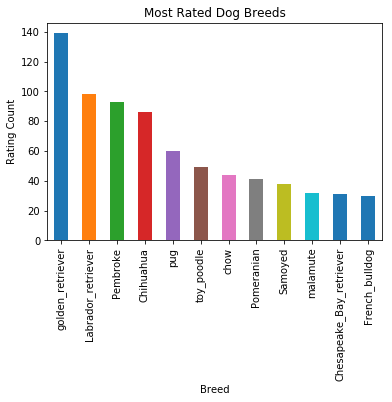

In [82]:
# only select dog breeds with 30 or more tweets assigned
df_common_breeds = twitter_archive_master.groupby('breed').filter(lambda x: len(x) >= 30)

# setup the bar chart
df_common_breeds['breed'].value_counts().plot(kind = 'bar')
plt.title('Most Rated Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Rating Count')

fig = plt.gcf() 
# save the figure to file for further use
fig.savefig('breeds.png',bbox_inches='tight');

The most rated breeds are the well-known golden retriever and labrador retriever-breed which is not a big surprise.

### Insight 2 with visualization

As a second insight I want to show the most frequent stage of the dogs. I therefore decide to visualize the stages in  a pie-chart.

In [88]:
twitter_archive_master.stage.value_counts()

none        1346
pupper       163
doggo         51
puppo         20
multiple       7
floofer        7
Name: stage, dtype: int64

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:521: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


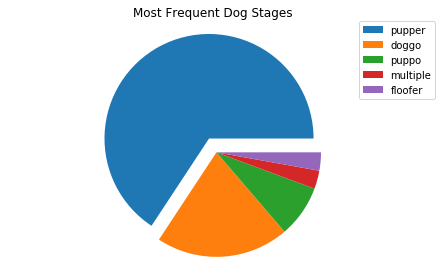

In [105]:
# source: https://chrisalbon.com/python/data_visualization/matplotlib_pie_chart/
# source: https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart/43281595
plt.pie(
    # using data total)arrests
    twitter_archive_master.query("stage!='none'").stage.value_counts(),
    # with no shadows
    shadow=False,
    # with one slide exploded out
    explode=(0.15, 0, 0, 0, 0, 0),
    )

plt.legend(twitter_archive_master.query("stage!='none'").stage.value_counts(),
           labels=["pupper", "doggo", "puppo", "multiple",  "floofer"], 
           bbox_to_anchor=(0.85,1.025), loc="upper left")
# View the plot drop above
plt.axis('equal')
plt.title('Most Frequent Dog Stages')

# View the plot
plt.tight_layout()
fig = plt.gcf()
fig.savefig('stages.png',bbox_inches='tight');
plt.show()

The most frequent dog stage is the 'pupper' stage. Unfortunately many tweets are missing the stage attribute.

### Insight 3 with visualization

In [84]:
breed_fav_counts = twitter_archive_master.query("breed != 'none'").groupby(['breed'])['favorite_count'].sum().sort_values(ascending = False)


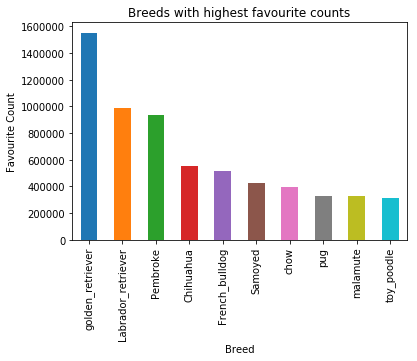

In [85]:
# only select top 10
top10 = breed_fav_counts.head(10)

# setup the bar chart
top10.plot(kind = 'bar')
plt.title('Breeds with highest favourite counts')
plt.xlabel('Breed')
plt.ylabel('Favourite Count')

fig = plt.gcf() 
# save the figure to file for further use
fig.savefig('breeds_fav_counts.png',bbox_inches='tight');

The golden_retriever and labrador_retriever are also the breeds with the highest favourite_count.

## Reporting

Please see separate PDF files.